In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from get_aq_data import get_flo_data, ID_to_name

In [3]:
data, hourly_mean, daily_mean = get_flo_data()

In [4]:
import sys
sys.path.append('/Users/robin/code/PyAURN')

In [5]:
import importAURN

SOUT = importAURN.importAURN('SOUT', range(2018, 2020))

AURN = SOUT['2019-05-05']['PM2.5']

/Users/robin/anaconda3/envs/breathingspaces/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


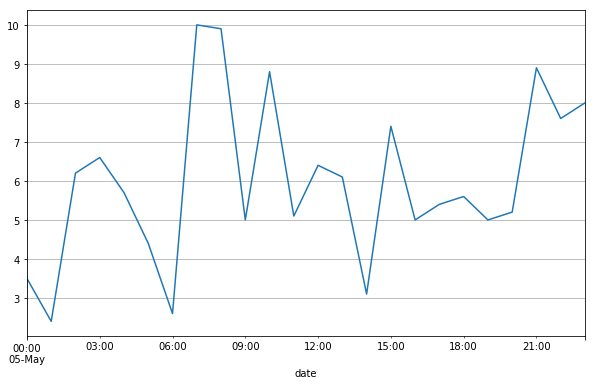

In [7]:
AURN.plot(figsize=(10, 6), grid=True)

In [45]:
all_site_daily_mean = daily_mean.mean(axis=1)
all_site_daily_std = daily_mean.std(axis=1)

In [46]:
AURN_daily_mean = AURN.resample('1D').mean()

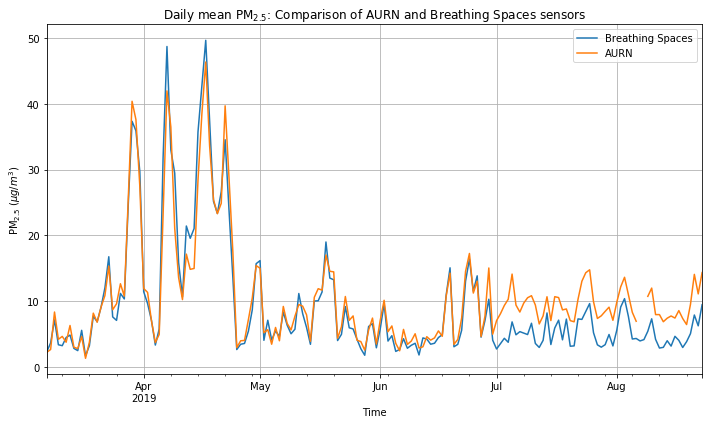

In [47]:
ax = all_site_daily_mean.plot(figsize=(10, 6), label='Breathing Spaces')
AURN_daily_mean.plot(ax=ax, label="AURN")
plt.legend()
plt.grid(axis='both', which='major')
plt.xlabel('Time')
plt.ylabel('$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.title('Daily mean $\mathrm{PM}_{2.5}$: Comparison of AURN and Breathing Spaces sensors')
plt.tight_layout()
plt.savefig('graphs/AURN_Comparison_WholePeriod.png', dpi=300)

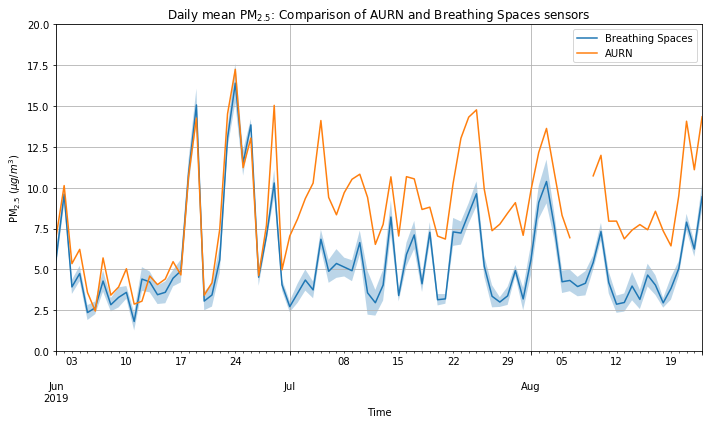

In [48]:
ax = all_site_daily_mean.plot(figsize=(10, 6), label='Breathing Spaces')
plt.fill_between(all_site_daily_mean.index, all_site_daily_mean - all_site_daily_std, all_site_daily_mean + all_site_daily_std, alpha=0.3)
AURN_daily_mean.plot(ax=ax, label="AURN")
plt.xlim('2019-06-01', '2019-08-23')
plt.ylim(0,20)
plt.legend()
plt.grid(axis='both', which='major')
plt.xlabel('Time')
plt.ylabel('$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.title('Daily mean $\mathrm{PM}_{2.5}$: Comparison of AURN and Breathing Spaces sensors')
plt.tight_layout()
plt.savefig('graphs/AURN_Comparison_Zoomed_WithUncertainty.png', dpi=300)

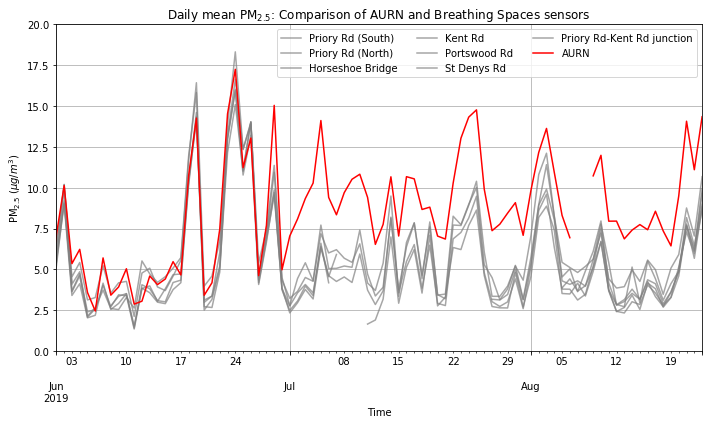

In [49]:
ax = daily_mean.rename(columns=ID_to_name).plot(figsize=(10, 6), label='Breathing Spaces', color='gray', alpha=0.7)
AURN_daily_mean.plot(ax=ax, label="AURN", color='r')
plt.xlim('2019-06-01', '2019-08-23')
plt.ylim(0,20)
plt.legend(ncol=3)
plt.grid(axis='both', which='major')
plt.xlabel('Time')
plt.ylabel('$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.title('Daily mean $\mathrm{PM}_{2.5}$: Comparison of AURN and Breathing Spaces sensors')
plt.tight_layout()
plt.savefig('graphs/AURN_Comparison_Zoomed_WithAllSensors.png', dpi=300)

In [50]:
AURN_daily_mean.index = AURN_daily_mean.index.date

In [51]:
combined = pd.DataFrame({'AURN': AURN_daily_mean, 'BreathingSpaces': all_site_daily_mean})

In [55]:
combined.index = pd.DatetimeIndex(combined.index)

In [57]:
combined.groupby(combined.index.month).apply(lambda x: x.corr())

AURN  BreathingSpaces
3 AURN             1.000000         0.993456
  BreathingSpaces  0.993456         1.000000
4 AURN             1.000000         0.964031
  BreathingSpaces  0.964031         1.000000
5 AURN             1.000000         0.965530
  BreathingSpaces  0.965530         1.000000
6 AURN             1.000000         0.966177
  BreathingSpaces  0.966177         1.000000
7 AURN             1.000000         0.846558
  BreathingSpaces  0.846558         1.000000
8 AURN             1.000000         0.925768
  BreathingSpaces  0.925768         1.000000